## stroke 유무(1, 0) 예측하기 ML모델만들기

ML Estimator : DecisionTreeClassifier, RandomForestClassifier, XGBClassifier

#### 데이터 탐색 및 모델 만들기 과정
1. 데이터 로딩
2. EDA
  - 피처간 상관관계 보기
  - 카운트 플랏 
3. 데이터 전처리
  - 불필요한 Feature 제거
  - 결측치 처리
  - 문자열 데이터 숫자로 인코딩 
4. 머신러닝 모델 만들기
  - 학습/테스트 데이터 준비하기
  - 학습모델 학습하기
5. 성능평가
  - 모델 테스트하기
  - 성능 평가하기

In [13]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
df.shape

(5110, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 불필요한 Feature 제거

In [19]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA(탐색적 데이터 분석)
- 데이터 통계량 확인하기
- 데이터의 특징 파악하기
- feature들 간의 상관관계
- feature와 target과의 관계에서 어떤 특징들이 있는지 탐색하기

In [20]:
#[문제] 수치형 데이터 통계량 확인하기
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 테이블 데이터 통계 확인

In [21]:
#[문제] 범주형 데이터 컬럼 리스트 추출
cat_columns = [col for col in df.columns if df[col].dtypes == 'object']
print(cat_columns)


['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [22]:
#[문제] 수치형 데이터 컬럼 리스트 추출
num_columns = [col for col in df.columns if df[col].dtypes != 'object']
print(num_columns)


['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [23]:
#[문제] 문자형 데이터 통계 확인
df[cat_columns].describe()


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [24]:
#[문제] gender 컬럼의 value 카운트 하기


In [25]:
#[문제] 수치형 데이터 기초 통계 확인
df[num_columns].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [26]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


## 데이터 시각화로 탐색하기

<AxesSubplot:xlabel='gender', ylabel='count'>

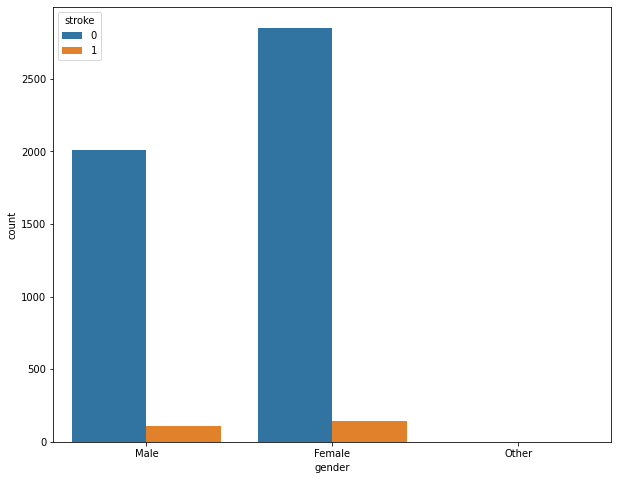

In [27]:
#[문제] 성별에 따른 stroke의 0, 1 카운트 시각화
plt.figure(figsize=(10,8))
sns.countplot(x = 'gender', data = df, hue = 'stroke')


In [28]:
#[문제] 문자형 데이터 개별 값과 stroke와의 관계 확인하기


In [29]:
#[문제] 나이와 stroke과의 관계 확인하기(histplot())
sns.histplot(x = 'age', y = 'Count')

ValueError: Could not interpret value `age` for parameter `x`

In [ ]:
df['bmi'].count()

4909

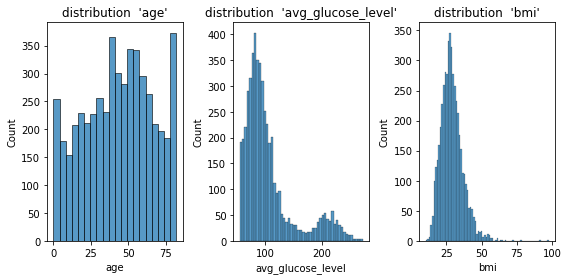

In [ ]:
#[문제] sns.histplot()으로, 수치형 데이터의 분포 알아보기
num_columns_g = ['age', 'avg_glucose_level', 'bmi']


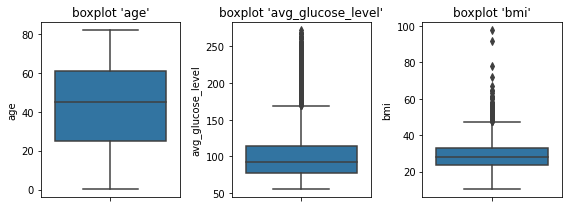

In [ ]:
# [문제] 통계량은 boxplot으로 살펴보고, sns.boxplots() 활용


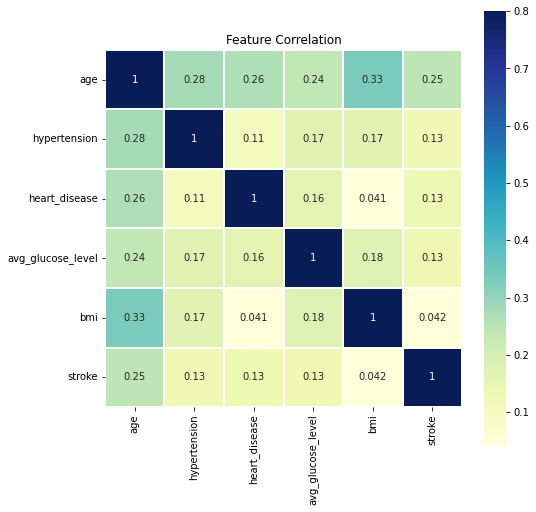

In [ ]:
# [문제]피처들간의 상관관계 살펴보기



## 결측치 처리하기

In [ ]:
#[문제] 컬럼의 결측데이터 갯수 확인하기


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#[문제] bmi 컬럼에 결측데이터, 컬럼 평균값으로 채우기


## 문자형 데이터 숫자로 encoding하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df[cat_columns].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
# LabelEncoder 적용
# [문제] 다음 목록 레이블 인코딩 하기
# gender, ever_married, Residence_type, smoking_status



In [ ]:
#[문제] work_type 컬럼 one-hot-encoding 적용하기


In [ ]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,2,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,2,1,0,0,1,0,0


## 트레이닝 데이터 준비하기

In [ ]:
#[문제] X, y 데이터 준비하기
y = 
X = 

In [ ]:
#[문제] 학습데이터 / 테스트 데이터 분리
from sklearn.model_selection import train_test_split
# test_size=0.25, stratify=y, random_state=41


## Decision Tree로 뇌졸증 예측해보기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#[문제] decision tree로 학습모델 만들고 정확도 측정하기


accuracy : 0.9099804305283757


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#[문제] classification_report() 결과 출력


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.10      0.10      0.10        50

    accuracy                           0.91      1022
   macro avg       0.52      0.53      0.53      1022
weighted avg       0.91      0.91      0.91      1022



### RandomForestClassifier로 학습모델 만들기

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#[문제] randomforestclassifier로 학습모델 만들기


accuracy : 0.9481409001956947


In [ ]:
#[문제] classification_report() 결과 출력


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



### XGBClassifier
- https://xgboost.readthedocs.io/en/stable/
- 한글 정리문서 : https://wooono.tistory.com/97

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
#xgb_clf = XGBClassifier(objectivate='binary:logistic')

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)


NameError: name 'X_train' is not defined

In [ ]:
print(classification_report(y_test, y_pred))


NameError: name 'classification_report' is not defined

In [ ]:
accuracy:  0.9453942834839039
accuracy:  0.9453942834839039



In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb_clf)
pyplot.show()

NotFittedError: need to call fit or load_model beforehand

In [ ]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install python3-disutils

ERROR: Could not find a version that satisfies the requirement python3-disutils (from versions: none)
ERROR: No matching distribution found for python3-disutils
Note: you may need to restart the kernel to use updated packages.


NotFittedError: need to call fit or load_model beforehand

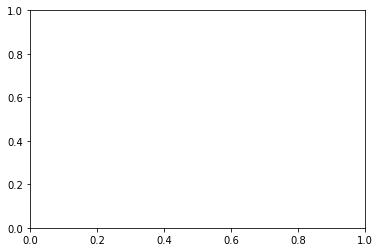

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

xgb.plot_tree(xgb_clf, num_trees=0, rankdir='TB')

fig = plt.gcf()
fig.set_size_inches(150,150)

fig.savefig('tree.png')

plt.show()